## WeRateDogs Wrangling  

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Gathering 

In [2]:
arc = pd.read_csv('twitter-archive-enhanced.csv')
arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(folder_name,url.split('/')[-1]),mode = 'wb') as file:
    file.write(response.content)

In [5]:
img = pd.read_csv(folder_name +'/image-predictions.tsv', sep='\t') 
img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
consumer_key = '*'
consumer_secret = '*'
access_token = '*'
access_secret = '*'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [7]:
tweets_list = {}
for tweet in list(arc.tweet_id):
    try:
        tweet_status = api.get_status(tweet, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        tweets_list[str(tweet)] = tweet_status._json
    except: 
        print(str(tweet))

888202515573088257
873697596434513921
872668790621863937
872261713294495745
869988702071779329
866816280283807744
861769973181624320
856602993587888130
845459076796616705
844704788403113984
842892208864923648
837012587749474308
827228250799742977
812747805718642688
802247111496568832
775096608509886464
770743923962707968
Rate limit reached. Sleeping for: 734
754011816964026368
680055455951884288
Rate limit reached. Sleeping for: 731


In [8]:
with open('tweet_json.txt', 'w') as file:
    json.dump(tweets_list, file)

In [9]:
with open('tweet_json.txt') as file:
    data = json.load(file)

tweet_json = pd.read_json('tweet_json.txt', orient='index')
tweet_json.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1998-04-12 22:37:23.555336193,NaN,NaN,2017-08-01 16:23:56,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37558,0,NaN,892420643555336192,892420643555336192,...,NaN,NaN,NaN,8193,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-04-10 03:03:41.306343426,NaN,NaN,2017-08-01 00:17:27,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,32281,0,NaN,892177421306343424,892177421306343424,...,NaN,NaN,NaN,6060,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,1,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-04-05 22:26:21.378084864,NaN,NaN,2017-07-31 00:18:03,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,24320,0,NaN,891815181378084864,891815181378084864,...,NaN,NaN,NaN,4008,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,1,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-04-04 11:32:37.279858688,NaN,NaN,2017-07-30 15:58:51,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",40908,0,NaN,891689557279858688,891689557279858688,...,NaN,NaN,NaN,8348,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,0,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1998-03-31 06:59:18.926688256,NaN,NaN,2017-07-29 16:00:24,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,39096,0,NaN,891327558926688256,891327558926688256,...,NaN,NaN,NaN,9041,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,1,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [10]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2337 entries, 1998-04-12 22:37:23.555336193 to 1991-02-08 13:48:08.022790149
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2337 non-null datetime64[ns]
entities                         2337 non-null object
extended_entities                1822 non-null object
favorite_count                   2337 non-null int64
favorited                        2337 non-null int64
geo                              0 non-null float64
id                               2337 non-null int64
id_str                           2337 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  23

In [11]:
df_list = []
for id in data.keys():
    retweets = data[id]['retweet_count']
    favorites = data[id]['favorite_count']
    df_list.append({'tweet_id': id, 'retweets': retweets, 'favorites': favorites})

df_list
df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweets', 'favorites'])

In [12]:
df.head()

,tweet_id,retweets,favorites
0,892420643555336193,8193,37558
1,892177421306343426,6060,32281
2,891815181378084864,4008,24320
3,891689557279858688,8348,40908
4,891327558926688256,9041,39096


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
tweet_id     2337 non-null object
retweets     2337 non-null int64
favorites    2337 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


There are 3 dataframes: 
- arc dataframe containing the manually downloaded tweet archive
- img dataframe containing the programmaticaly downloaded image prediction of dog breed based on the images 
- df dataframe containing the queried data of retweets and favorites counts downloaded using tweepy API 

## Assessing 

In [14]:
arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

- tweet_id in arc should have been string datatype 
- timestamp column need to have date time datatype
- rating_numerator and rating_denominator need to be changed into float
- dropping rows with value on retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns for original tweet only 

In [15]:
arc['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
arc['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

- some of value in rating_denominator and rating_numerator columns needs to be examined because it's too high 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
tweet_id     2337 non-null object
retweets     2337 non-null int64
favorites    2337 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


In [18]:
img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- tweet_id in img should have been string datatype 
- The differences in the entry number between each dataframes (some maybe from missing images)  


In [19]:
arc.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
df.describe()

,retweets,favorites
count,2337.000000,2337.000000
mean,2879.633291,7849.723149
std,4864.915973,12166.723724
min,1.000000,0.000000
25%,580.000000,1364.000000
50%,1345.000000,3422.000000
75%,3357.000000,9621.000000
max,82526.000000,162275.000000


In [22]:
df.head()

,tweet_id,retweets,favorites
0,892420643555336193,8193,37558
1,892177421306343426,6060,32281
2,891815181378084864,4008,24320
3,891689557279858688,8348,40908
4,891327558926688256,9041,39096


In [23]:
arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


- Timestamp have +0000 
- The last 4 columns (doggo, floofer, pupper, puppo) should have been made categorical in one column 
- Extracting source of the tweets from source column

In [24]:
arc.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2188,668975677807423489,NaN,NaN,2015-11-24 02:13:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeremy. He hasn't grown into his skin ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668975677...,11,10,Jeremy,None,None,None,None
1407,699079609774645248,NaN,NaN,2016-02-15 03:55:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Reagan. He's a Persnicketus Derpson. Grea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699079609...,8,10,Reagan,None,None,None,None
2121,670408998013820928,NaN,NaN,2015-11-28 01:08:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Peanut. He was the World Table Tennis ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670408998...,10,10,Peanut,None,None,None,None
587,799757965289017345,NaN,NaN,2016-11-18 23:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sobe. She's a h*ckin happy doggo. Only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/799757965...,13,10,Sobe,doggo,None,None,None
562,802600418706604034,NaN,NaN,2016-11-26 19:50:26 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Bailey. She has mastered the head tilt...,NaN,NaN,NaN,https://vine.co/v/5FwUWjYaW0Y,11,10,Bailey,None,None,None,None


In [25]:
arc['retweeted_status_id'].value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
8.780576e+17    1
7.320056e+17    1
7.186315e+17    1
6.732953e+17    1
7.914070e+17    1
8.447048e+17    1
7.862340e+17    1
8.685523e+17    1
7.504293e+17    1
8.327664e+17    1
6.690004e+17    1
6.873173e+17    1
7.638376e+17    1
7.815247e+17    1
8.092201e+17    1
8.000650e+17    1
8.174239e+17    1
8.001414e+17    1
7.909461e+17    1
7.867091e+17    1
8.406323e+17    1
8.688804e+17    1
7.869631e+17    1
7.733088e+17    1
8.222448e+17    1
               ..
6.816941e+17    1
7.899865e+17    1
7.939622e+17    1
6.800555e+17    1
7.128090e+17    1
8.164506e+17    1
6.769365e+17    1
6.675487e+17    1
8.083449e+17    1
7.626999e+17    1
6.678667e+17    1
8.479710e+17    1
6.820881e+17    1
8.352641e+17    1
7.761133e+17    1
7.902771e+17    1
6.675484e+17    1
7.677549e+17    1
8.782815e+17    1
8.663350e+17    1
7.399792e+17    1
7.403732e+17    1
8.395493e+17    1
7.001438e+17    1
8.482894e+

In [26]:
arc_s = arc['name'].astype(str).value_counts()
arc_s 

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Lola         10
Penny        10
Tucker       10
Winston       9
Bo            9
Sadie         8
the           8
Buddy         7
Daisy         7
Toby          7
an            7
Bailey        7
Rusty         6
Milo          6
Koda          6
Oscar         6
Stanley       6
Dave          6
Leo           6
Bella         6
Jack          6
Jax           6
Scout         6
Larry         5
           ... 
DayZ          1
Mosby         1
Staniel       1
Covach        1
Cannon        1
Rodman        1
Chef          1
Pawnd         1
Lili          1
Aiden         1
Akumi         1
Loomis        1
Cedrick       1
Jeffri        1
Grizz         1
Bruno         1
Kendall       1
Dudley        1
Ronnie        1
Ester         1
Poppy         1
Wesley        1
Pete          1
Cora          1
Noosh         1
Hermione      1
Pavlov        1
Willem        1
Tove          1
Maxwell       1
Name: name, Length: 957,

In [27]:
arc_s[(arc_s <= 5)].index.values

array(['Larry', 'Sunny', 'Gus', 'Alfie', 'Louis', 'George', 'Phil',
       'Oakley', 'Finn', 'Chester', 'Sammy', 'Bentley', 'very', 'Sophie',
       'Reggie', 'Bear', 'Winnie', 'Cassie', 'Shadow', 'Hank', 'Clark',
       'Carl', 'Brody', 'Jerry', 'Jeffrey', 'Archie', 'Chip', 'Maddie',
       'Reginald', 'Clarence', 'Ruby', 'Luna', 'Dexter', 'Scooter', 'Beau',
       'one', 'Maximus', 'Maggie', 'Gerald', 'Derek', 'just', 'Boomer',
       'Sampson', 'quite', 'Walter', 'Moose', 'Riley', 'Loki', 'Duke',
       'Bruce', 'Gary', 'Ellie', 'Calvin', 'Samson', 'Klevin', 'Peaches',
       'Lorenzo', 'Lily', 'Olive', 'Steven', 'Wilson', 'Kyle', 'Zoey',
       'Ted', 'Louie', 'Sebastian', 'Rosie', 'Gizmo', 'Wallace', 'Frankie',
       'Earl', 'Wyatt', 'Rory', 'Arnie', 'Coco', 'Mia', 'Zeke', 'Doug',
       'Paisley', 'Malcolm', 'Vincent', 'Reese', 'Jimothy', 'Waffles',
       'Nala', 'Max', 'Otis', 'Colby', 'Pickles', 'Herm', 'Abby', 'Curtis',
       'Moreton', 'Benedict', 'Butter', 'Paull', 'Juno'

- Some of the dog names have like a, the, an, very, by, quite, one, just, getting, actually, mad, not, old, his, my, infuriating, this, officially, unacceptable, incredibly, space, such, all, O, unacceptable. (maybe indicated by first character is a lowercase)

In [28]:
img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [29]:
img['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [30]:
img['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [31]:
img['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [32]:
img['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
web_site                      19
Cardigan                      19
beagle                        18
Maltese_dog                   18
Shetland_sheepdog             18
Eskimo_dog                    18
teddy                         18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

- The dog breed prediction and confidence columns can be converted into one column of breed and confidence 
- Cleaning the dog breed column into one structured format 

## Quality Problems 
- tweet_id in (arc) should have been string datatype 
- timestamp in (arc) column need to have date time datatype
- rating_numerator and rating_denominator in (arc) need to be changed into float
- dropping rows with value on retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns for original tweet only 
- some of value in rating_denominator and rating_numerator columns needs to be examined because it's too high 
- tweet_id in (img) should have been string datatype 
- Timestamp in (arc) visually have +0000 
- Extracting source of the tweets from source column
- Missing images (might not be covered this time) 
- Cleaning the dog breed column into one strctured format 
- Some of the dog names have like a, the, an, very, by, quite, one, just, getting, actually, mad, not, old, his, my, infuriating, this, officially, unacceptable, incredibly, space, such, all, O, unacceptable. (maybe indicated by first character is a lowercase)


## Tidiness Problems
- The last 4 columns (doggo, floofer, pupper, puppo) in (arc) should have been made categorical in one column 
- There are 3 dataframes which can be combined into 1 dataframe with tweet_id as its merging point 
- The dog breed prediction and confidence columns can be converted into one column of breed and confidence 


## Cleaning 

In [33]:
arc_c = arc.copy()
img_c = img.copy()
df_c = df.copy()

#### Define 
Changing the datatype of tweet_id in (arc) and (img) columns from integer into string

#### Code 

In [34]:
arc_c['tweet_id'] = arc_c['tweet_id'].apply(str) 
img_c['tweet_id'] = img_c['tweet_id'].apply(str)

#### Test 

In [35]:
arc_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [36]:
img_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Define 
Merging the three dataframes (arc_c, img_c, df_c) into one dataframe (master)

#### Code 

In [37]:
arc_com = pd.merge(arc_c, df_c, how = 'inner', on = 'tweet_id')
master = pd.merge(arc_com, img_c, how= 'inner', on = 'tweet_id')

#### Test 

In [38]:
master 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [39]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2065 entries, 0 to 2064
Data columns (total 30 columns):
tweet_id                      2065 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2065 non-null object
source                        2065 non-null object
text                          2065 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2065 non-null object
rating_numerator              2065 non-null int64
rating_denominator            2065 non-null int64
name                          2065 non-null object
doggo                         2065 non-null object
floofer                       2065 non-null object
pupper                        2065 non-null object
puppo                         2065 non-null object
retweets                      2065

#### Define 
Merging the 4 columns of dog stages into one column in the (rate_dog) dataframe

#### Code 

In [40]:
master['dog_stages'] = master.doggo + master.floofer + master.pupper + master.puppo
master['dog_stages'].value_counts()

NoneNoneNoneNone        1744
NoneNonepupperNone       211
doggoNoneNoneNone         67
NoneNoneNonepuppo         23
doggoNonepupperNone       11
NoneflooferNoneNone        7
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: dog_stages, dtype: int64

It looks like there is additional problems for those with multiple stages 

In [41]:
master.loc[master.dog_stages == 'NoneNoneNoneNone', 'dog_stages'] = np.nan
master.loc[master.dog_stages == 'NoneNonepupperNone', 'dog_stages'] = 'pupper'
master.loc[master.dog_stages == 'doggoNoneNoneNone', 'dog_stages'] = 'doggo'
master.loc[master.dog_stages == 'NoneNoneNonepuppo', 'dog_stages'] = 'puppo'
master.loc[master.dog_stages == 'doggoNonepupperNone', 'dog_stages'] = 'doggo, pupper'
master.loc[master.dog_stages == 'NoneflooferNoneNone', 'dog_stages'] = 'floofer'
master.loc[master.dog_stages == 'doggoNoneNonepuppo', 'dog_stages'] = 'doggo, puppo'
master.loc[master.dog_stages == 'doggoflooferNoneNone', 'dog_stages'] = 'doggo, floofer'
master['dog_stages'].value_counts()

pupper            211
doggo              67
puppo              23
doggo, pupper      11
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: dog_stages, dtype: int64

In [42]:
master.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

#### Test

In [43]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2065 entries, 0 to 2064
Data columns (total 27 columns):
tweet_id                      2065 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2065 non-null object
source                        2065 non-null object
text                          2065 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2065 non-null object
rating_numerator              2065 non-null int64
rating_denominator            2065 non-null int64
name                          2065 non-null object
retweets                      2065 non-null int64
favorites                     2065 non-null int64
jpg_url                       2065 non-null object
img_num                       2065 non-null int64
p1                            2065 no

#### Define 
Dropping rows with value on retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns for original tweet only 

#### Code 

In [44]:
master1 = master[pd.isnull(master['retweeted_status_id'])]

#### Test

In [45]:
master1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 2064
Data columns (total 27 columns):
tweet_id                      1990 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1990 non-null object
source                        1990 non-null object
text                          1990 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1990 non-null object
rating_numerator              1990 non-null int64
rating_denominator            1990 non-null int64
name                          1990 non-null object
retweets                      1990 non-null int64
favorites                     1990 non-null int64
jpg_url                       1990 non-null object
img_num                       1990 non-null int64
p1                            1990 non-n

#### Define 
timestamp in (master) column need to have date time datatype and visually have +0000 

#### Code 

In [46]:
master1['timestamp'] = pd.to_datetime(master1['timestamp'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Test

In [47]:
master1['timestamp']

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
5      2017-07-29 00:08:17
6      2017-07-28 16:27:12
7      2017-07-28 00:22:40
8      2017-07-27 16:25:51
9      2017-07-26 15:59:51
10     2017-07-26 00:31:25
11     2017-07-25 16:11:53
12     2017-07-25 01:55:32
13     2017-07-25 00:10:02
14     2017-07-24 17:02:04
15     2017-07-24 00:19:32
16     2017-07-23 00:22:39
17     2017-07-22 16:56:37
18     2017-07-22 00:23:06
19     2017-07-20 16:49:33
20     2017-07-19 16:06:48
21     2017-07-19 03:39:09
22     2017-07-19 00:47:34
23     2017-07-18 16:08:03
24     2017-07-18 00:07:08
25     2017-07-17 16:17:36
26     2017-07-16 23:58:41
27     2017-07-16 20:14:00
28     2017-07-15 23:25:31
29     2017-07-15 16:17:19
               ...        
2035   2015-11-17 00:24:19
2036   2015-11-17 00:06:54
2037   2015-11-16 23:23:41
2038   2015-11-16 21:54:18
2039   2015-11-16 21:10:36
2040   2015-11-16 20:32:58
2

In [48]:
master1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 2064
Data columns (total 27 columns):
tweet_id                      1990 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1990 non-null datetime64[ns]
source                        1990 non-null object
text                          1990 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1990 non-null object
rating_numerator              1990 non-null int64
rating_denominator            1990 non-null int64
name                          1990 non-null object
retweets                      1990 non-null int64
favorites                     1990 non-null int64
jpg_url                       1990 non-null object
img_num                       1990 non-null int64
p1                            19

#### Define 
rating_numerator and rating_denominator will be changed to float datatype and there will be attempt to extract the value from the text column

#### Code: Rating_Denominator

In [49]:
master1['rating_numerator'] = master1['rating_numerator'].apply(float) 
master1['rating_denominator'] = master1['rating_denominator'].apply(float) 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [50]:
master1['rating_denominator'].value_counts()

10.0     1972
50.0        3
80.0        2
11.0        2
130.0       1
170.0       1
150.0       1
2.0         1
120.0       1
110.0       1
40.0        1
90.0        1
20.0        1
7.0         1
70.0        1
Name: rating_denominator, dtype: int64

In [51]:
deno = master1[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]
deno.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 2064
Data columns (total 4 columns):
tweet_id              1990 non-null object
text                  1990 non-null object
rating_numerator      1990 non-null float64
rating_denominator    1990 non-null float64
dtypes: float64(2), object(2)
memory usage: 77.7+ KB


In [52]:
deno1 = deno.query('rating_denominator != 10')
deno1

,tweet_id,text,rating_numerator,rating_denominator
339,820690176645140481,The floofs have been released I repeat the flo...,84.0,70.0
409,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24.0,7.0
728,758467244762497024,Why does this never happen at my front door......,165.0,150.0
869,740373189193256964,"After so many requests, this is Bretagne. She ...",9.0,11.0
917,731156023742988288,Say hello to this unbelievably well behaved sq...,204.0,170.0
960,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,4.0,20.0
994,716439118184652801,This is Bluebert. He just saw that both #Final...,50.0,50.0
1015,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,99.0,90.0
1040,710658690886586372,Here's a brigade of puppers. All look very pre...,80.0,80.0
1058,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro...",45.0,50.0


In [53]:
pd.set_option("display.max_colwidth",280)

In [54]:
deno1

,tweet_id,text,rating_numerator,rating_denominator
339,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
409,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0
728,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
869,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11.0
917,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
960,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0
994,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
1015,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1040,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1058,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0


We will fix some of the rating denominator manually; however, there will be some of the numerator & denominator whose rating is the same as with its text, which will be excluded as it may make outliers for our analysis: index 339, 728, 917, 1015, 1040, 1058, 1124, 1200, 1372, 1373, 1504, 1563 


In [55]:
#The 24/7
master1.loc[[409], ['rating_numerator']] = 10
master1.loc[[409], ['rating_denominator']] = 10

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [56]:
#9/11 
master1.loc[[869], ['rating_numerator']] = 14
master1.loc[[869], ['rating_denominator']] = 10

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [57]:
#4/20
master1.loc[[960], ['rating_numerator']] = 13
master1.loc[[960], ['rating_denominator']] = 10

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [58]:
#50/50 
master1.loc[994, 'rating_numerator'] = 11 
master1.loc[994, 'rating_denominator'] = 10

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [59]:
#7/11
master1.loc[1398, 'rating_numerator'] = 10 
master1.loc[1398, 'rating_denominator'] = 10

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [60]:
#1/2
master1.loc[2044, 'rating_numerator'] = 9 
master1.loc[2044, 'rating_denominator'] = 10

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


#### Test

In [61]:
master1['rating_denominator'].value_counts()

10.0     1978
50.0        2
80.0        2
130.0       1
150.0       1
120.0       1
110.0       1
40.0        1
90.0        1
170.0       1
70.0        1
Name: rating_denominator, dtype: int64

#### Code: Rating_Numerator

In [62]:
master1['rating_numerator'].value_counts()

12.0      449
10.0      420
11.0      397
13.0      260
9.0       151
8.0        95
7.0        51
14.0       36
5.0        33
6.0        32
3.0        19
4.0        15
2.0         9
1.0         4
0.0         2
84.0        1
27.0        1
143.0       1
420.0       1
80.0        1
45.0        1
60.0        1
44.0        1
26.0        1
144.0       1
88.0        1
165.0       1
75.0        1
1776.0      1
99.0        1
121.0       1
204.0       1
Name: rating_numerator, dtype: int64

as we can see that, the value of the numerator that needs to be examined will be between 0-2 and those above 20 

In [63]:
nume = master1[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]
nume.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 2064
Data columns (total 4 columns):
tweet_id              1990 non-null object
text                  1990 non-null object
rating_numerator      1990 non-null float64
rating_denominator    1990 non-null float64
dtypes: float64(2), object(2)
memory usage: 157.7+ KB


In [64]:
nume1 = nume.query('rating_numerator <= 2')
nume1

,tweet_id,text,rating_numerator,rating_denominator
243,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0.0,10.0
825,746906459439529985,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",0.0,10.0
1488,678675843183484930,Exotic pup here. Tail long af. Throat looks swollen. Might breathe fire. Exceptionally unfluffy 2/10 would still pet https://t.co/a8SqCaSo2r,2.0,10.0
1491,678424312106393600,This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t.co/rtMtjSl9pz,2.0,10.0
1588,675153376133427200,What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0,1.0,10.0
1635,674265582246694913,This is Henry. He's a shit dog. Short pointy ears. Leaves trail of pee. Not fluffy. Doesn't come when called. 2/10 https://t.co/Pu9RhfHDEQ,2.0,10.0
1792,670826280409919488,"Scary dog here. Too many legs. Extra tail. Not soft, let alone fluffy. Won't bark. Moves sideways. Has weapon. 2/10 https://t.co/XOPXCSXiUT",2.0,10.0
1804,670783437142401025,Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO,1.0,10.0
1947,668142349051129856,This lil pup is Oliver. Hops around. Has wings but doesn't fly (lame). Annoying chirp. Won't catch tennis balls 2/10 https://t.co/DnhUw0aBM2,2.0,10.0
1956,667878741721415682,This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10 https://t.co/LvP1TTYSCN,2.0,10.0


Looks normal and we will rather decide to include 0 numerator rating at our analysis or not

In [65]:
nume2 = nume.query('rating_numerator >= 20')
nume2

,tweet_id,text,rating_numerator,rating_denominator
339,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
551,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10.0
607,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10.0
728,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
795,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0,10.0
917,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
1015,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1040,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1058,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
1124,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0


We will followup and adjust our previous index list from denominators: index 339, 728, 795, 917, 1015, 1040, 1058, 1124, 1200, 1372, 1373, 1504, 1563, 1787. All of the problems in the rating sections seem stem from the faulty number recognizion system (if there is more than 2 sets of number in the text, the system will take the first one) and the integer datatype that would not allow the number after the period. 

In [66]:
#75/10
master1.loc[551, 'rating_numerator'] = 9.75 
master1.loc[551, 'rating_denominator'] = 10

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [67]:
#27/10
master1.loc[607, 'rating_numerator'] = 11.27 
master1.loc[607, 'rating_denominator'] = 10

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [68]:
#26/10
master1.loc[1444, 'rating_numerator'] = 11.26 
master1.loc[1444, 'rating_denominator'] = 10

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


#### Test 

In [69]:
master1['rating_numerator'].value_counts()

12.00      449
10.00      420
11.00      397
13.00      260
9.00       151
8.00        95
7.00        51
14.00       36
5.00        33
6.00        32
3.00        19
4.00        15
2.00         9
1.00         4
0.00         2
84.00        1
9.75         1
143.00       1
420.00       1
80.00        1
45.00        1
60.00        1
44.00        1
144.00       1
88.00        1
11.26        1
165.00       1
11.27        1
1776.00      1
99.00        1
121.00       1
204.00       1
Name: rating_numerator, dtype: int64

#### Define 
We will fix the list of the names that are indicated by lowerspace character (a, the, an, very, by, quite, one, just, getting, actually, mad, not, old, his, my, infuriating, this, officially, unacceptable, incredibly, space, such, all, unacceptable) and 0.  

#### Code

In [70]:
master1['name'].isnull().value_counts()

False    1990
Name: name, dtype: int64

In [71]:
wrong_name =['a', 'the', 'an', 'very', 'by', 'quite', 'one', 'just', 'getting', 'actually', 'mad', 'not', 'old','his', 'my', 'infuriating', 'this', 'officially', 'unacceptable', 'incredibly', 'space', 'such', 'all', 'unacceptable', 0]

master1.loc[master1.name.isin(wrong_name), 'name'] = 'None'

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


#### Test

In [72]:
master1.name.value_counts()

None       643
Cooper      10
Lucy        10
Oliver      10
Charlie     10
Tucker       9
Penny        9
Sadie        8
Winston      8
Lola         7
Toby         7
Daisy        7
Bo           6
Stanley      6
Koda         6
Jax          6
Bella        6
Scout        5
Milo         5
Oscar        5
Dave         5
Bailey       5
Louis        5
Buddy        5
Chester      5
Leo          5
Rusty        5
Bentley      4
Archie       4
Alfie        4
          ... 
Pip          1
Zara         1
Doobert      1
Tuco         1
Koko         1
Poppy        1
Anakin       1
Ronnie       1
Roscoe       1
Dwight       1
Toffee       1
Venti        1
Fabio        1
Hazel        1
Mosby        1
Craig        1
Marq         1
Tiger        1
Aiden        1
Dawn         1
Akumi        1
Loomis       1
Ralph        1
Grizz        1
Bruno        1
Arnie        1
Kendall      1
Dudley       1
Lili         1
Willie       1
Name: name, Length: 914, dtype: int64

In [73]:
master1.query('name == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages


#### Define 
- Extracting source of the tweets from source column in master1

#### Code

In [74]:
master1['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1952
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [75]:
master1.loc[master1.source == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'source'] = 'iPhone'
master1.loc[master1.source == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'source'] = 'Web'
master1.loc[master1.source == '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'source'] = 'TweetDeck'

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


#### Test 

In [76]:
master1.source.value_counts()

iPhone       1952
Web            28
TweetDeck      10
Name: source, dtype: int64

#### Define 
We will combine 3 columns of breed and prediction into one column of breed and prediction as well as making a structured format of the breed 

#### Code

In [77]:
breed = []
confidence = []

def breed_confidence(dog):
    if dog['p1_dog'] == True:
        breed.append(dog['p1'])
        confidence.append(dog['p1_conf'])
    elif dog['p2_dog'] == True:
        breed.append(dog['p2'])
        confidence.append(dog['p2_conf'])
    elif dog['p3_dog'] == True:
        breed.append(dog['p3'])
        confidence.append(dog['p3_conf'])
    else:
        breed.append('Unrecognized')
        confidence.append(0)


In [78]:
master1.apply(breed_confidence, axis=1)

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
2035    None
2036    None
2037    None
2038    None
2039    None
2040    None
2041    None
2042    None
2043    None
2044    None
2045    None
2046    None
2047    None
2048    None
2049    None
2050    None
2051    None
2052    None
2053    None
2054    None
2055    None
2056    None
2057    None
2058    None
2059    None
2060    None
2061    None
2062    None
2063    None
2064    None
Length: 1990, dtype: object

In [79]:
master1['breed'] = breed
master1['confidence'] = confidence
master1.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages,breed,confidence
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,False,bagel,0.085851,False,banana,0.076110,False,NaN,Unrecognized,0.000000
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,Chihuahua,0.323581
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,Chihuahua,0.716012
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,Labrador_retriever,0.168086
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,basset,0.555712


In [80]:
master1['img_num'].value_counts()

1    1708
2     190
3      62
4      30
Name: img_num, dtype: int64

In [81]:
master2 = master1.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1)

In [82]:
master2['breed']=master2['breed'].str.replace("_", ' ') 
master2['breed']=master2['breed'].str.title()

#### Test

In [83]:
master2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 2064
Data columns (total 20 columns):
tweet_id                      1990 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1990 non-null datetime64[ns]
source                        1990 non-null object
text                          1990 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1990 non-null object
rating_numerator              1990 non-null float64
rating_denominator            1990 non-null float64
name                          1990 non-null object
retweets                      1990 non-null int64
favorites                     1990 non-null int64
jpg_url                       1990 non-null object
img_num                       1990 non-null int64
dog_stages                  

In [84]:
master2['breed'].value_counts()

Unrecognized                   308
Golden Retriever               158
Labrador Retriever             106
Pembroke                        95
Chihuahua                       91
Pug                             62
Toy Poodle                      51
Chow                            48
Pomeranian                      42
Samoyed                         41
Malamute                        33
Chesapeake Bay Retriever        31
French Bulldog                  30
Cocker Spaniel                  30
Miniature Pinscher              25
Eskimo Dog                      22
German Shepherd                 21
Cardigan                        21
Staffordshire Bullterrier       21
Shih-Tzu                        20
Siberian Husky                  20
Beagle                          20
Maltese Dog                     19
Shetland Sheepdog               19
Rottweiler                      19
Lakeland Terrier                18
Kuvasz                          18
Basset                          17
Italian Greyhound   

In [85]:
master2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 2064
Data columns (total 20 columns):
tweet_id                      1990 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1990 non-null datetime64[ns]
source                        1990 non-null object
text                          1990 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1990 non-null object
rating_numerator              1990 non-null float64
rating_denominator            1990 non-null float64
name                          1990 non-null object
retweets                      1990 non-null int64
favorites                     1990 non-null int64
jpg_url                       1990 non-null object
img_num                       1990 non-null int64
dog_stages                  

## Saving the data

In [86]:
master2.to_csv('twitter_archive_master.csv', encoding='utf-8',index=False)

## Explanatory Data Analysis
Data Source: 
- tweet source analysis 
- rating analysis 
- retweets and favorits analysis 
- dog breed analysis
- dog stage analysis

## Analysis 1:  Retweets & Favorites 
Before we analyze the relationship directly, we should look at the relationship between retweet count and favorite count

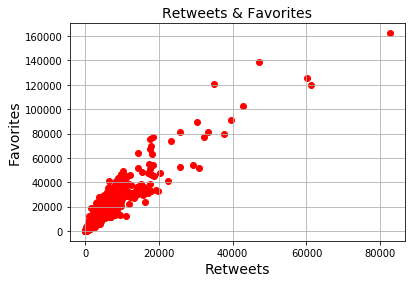

In [87]:
plt.scatter(master2['retweets'], master2['favorites'], color='red')
plt.title('Retweets & Favorites', fontsize=14)
plt.xlabel('Retweets', fontsize=14)
plt.ylabel('Favorites', fontsize=14)
plt.grid(True)
plt.savefig('Retweets&Favorites.png')
plt.show()

We can determine that the retweets count and favorites have positive relationship and we can use either one as benchmark

## Analysis 2: Dog stages with Retweets & Favorites 
We will analyze the most favorited dog stages according to retweets and favorites

In [88]:
stages = master2['dog_stages'].value_counts().values

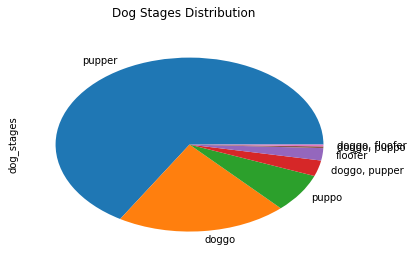

In [120]:
master2.dog_stages.value_counts().plot.pie(subplots=True, title="Dog Stages Distribution")
plt.savefig('Dog_Stages_Distribution.png')

eventhough we knew that there are a lot of people that did not fill their dog stages as there are many NaN values, we can see that pupper is the number one and doggo is number 2 in terms of dog stage count. 

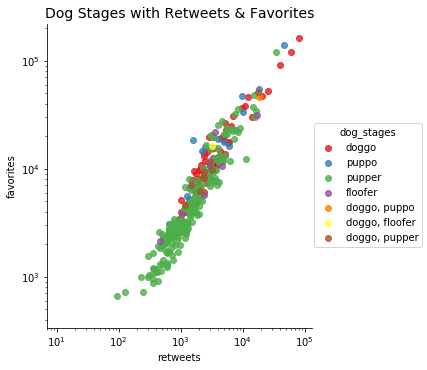

In [90]:
sns.lmplot(x="retweets", y="favorites",data=master2, hue='dog_stages', fit_reg=False, palette="Set1")
plt.title('Dog Stages with Retweets & Favorites', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.savefig('Stages_with_Favorits&Retweets.png')

We can see that there are a lot of entries for pupper stage

In [123]:
master2.groupby('dog_stages')['favorites'].sum().sort_values(ascending=False)

dog_stages
pupper            1405044
doggo             1250322
puppo              473683
doggo, pupper      115776
floofer             87644
doggo, puppo        45737
doggo, floofer      16336
Name: favorites, dtype: int64

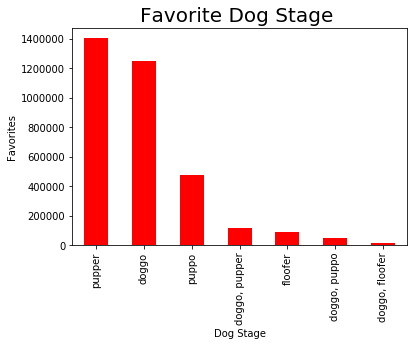

In [121]:
master2.groupby('dog_stages')['favorites'].sum().sort_values(ascending=False).plot(kind='bar',color='red')
plt.title("Favorite Dog Stage ",fontsize=20)
plt.xlabel("Dog Stage")
plt.ylabel("Favorites")
plt.savefig('Favorite_Dog_Stage.png')

In [124]:
master2.groupby('dog_stages')['retweets'].sum().sort_values(ascending=False)

dog_stages
pupper            449889
doggo             439054
puppo             136285
doggo, pupper      35512
floofer            32337
doggo, puppo       18048
doggo, floofer      3224
Name: retweets, dtype: int64

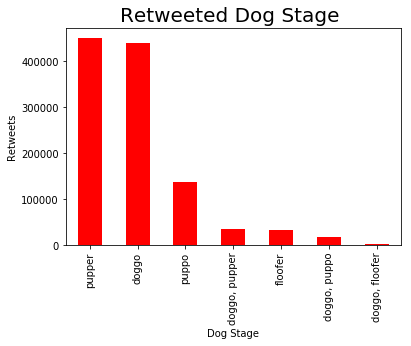

In [122]:
master2.groupby('dog_stages')['retweets'].sum().sort_values(ascending=False).plot(kind='bar',color='red')
plt.title("Retweeted Dog Stage ",fontsize=20)
plt.xlabel("Dog Stage")
plt.ylabel("Retweets")
plt.savefig('Retweeted_Dog_Stage.png')

By both favorites and retweets, we an see that pupper is the most favorited stages which also supported by the amount of data entries

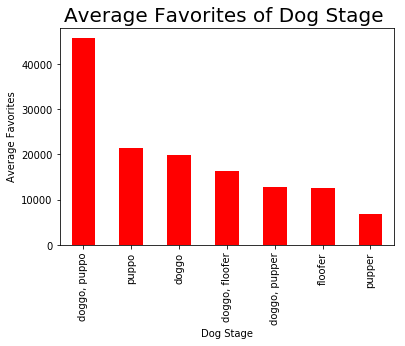

In [125]:
master2.groupby('dog_stages')['favorites'].mean().sort_values(ascending=False).plot(kind='bar',color='red')
plt.title("Average Favorites of Dog Stage ",fontsize=20)
plt.xlabel("Dog Stage")
plt.ylabel("Average Favorites")
plt.savefig('Average_Favorites_Dog_Stage.png')

In [93]:
master2.groupby('dog_stages')['favorites'].mean().sort_values(ascending=False)

dog_stages
doggo, puppo      45737.000000
puppo             21531.045455
doggo             19846.380952
doggo, floofer    16336.000000
doggo, pupper     12864.000000
floofer           12520.571429
pupper             6921.399015
Name: favorites, dtype: float64

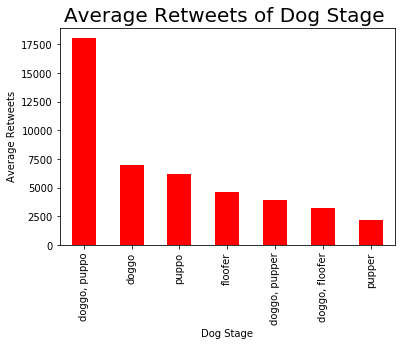

In [127]:
master2.groupby('dog_stages')['retweets'].mean().sort_values(ascending=False).plot(kind='bar',color='red')
plt.title("Average Retweets of Dog Stage ",fontsize=20)
plt.xlabel("Dog Stage")
plt.ylabel("Average Retweets")
plt.savefig('Average_Retweets_Dog_Stage.png')

In [128]:
master2.groupby('dog_stages')['retweets'].mean().sort_values(ascending=False)

dog_stages
doggo, puppo      18048.000000
doggo              6969.111111
puppo              6194.772727
floofer            4619.571429
doggo, pupper      3945.777778
doggo, floofer     3224.000000
pupper             2216.201970
Name: retweets, dtype: float64

On average, since doggo, puppo entry only have one entry, it might be invalied to be considered as the most favorited averagely which is why puppo is the most favorited stages on average while doggo is the one with the most average for retweets.  

## Analysis 3: Dog breed and retweets & favorites 
We will do the same analysis instead with dog breed this time

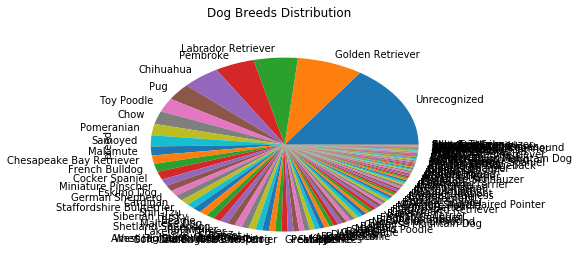

In [94]:
master2.breed.value_counts().plot.pie(subplots=True, title="Dog Breeds Distribution");

With the visuals become real hard to be seen, we decide to just take the top 10 dog breeds that have the most entry. 

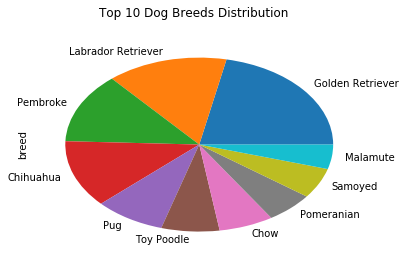

In [95]:
master2.query('breed != "Unrecognized"').breed.value_counts().nlargest(10).plot.pie(subplots=True, title="Top 10 Dog Breeds Distribution")
plt.savefig('Top_10_Dog_Breeds_Distribution.png')

In [96]:
master2.query('breed != "Unrecognized"').breed.value_counts().nlargest(10).sort_values(ascending=False)

Golden Retriever      158
Labrador Retriever    106
Pembroke               95
Chihuahua              91
Pug                    62
Toy Poodle             51
Chow                   48
Pomeranian             42
Samoyed                41
Malamute               33
Name: breed, dtype: int64

We have our top 10 entry breed prediction based on the frequency

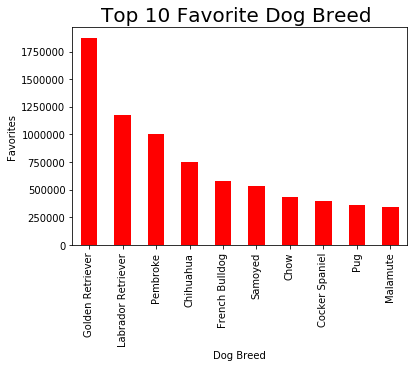

In [97]:
master2.query('breed != "Unrecognized"').groupby('breed')['favorites'].sum().sort_values(ascending=False).nlargest(10).plot(kind='bar',color='red')
plt.title("Top 10 Favorite Dog Breed ",fontsize=20)
plt.xlabel("Dog Breed")
plt.ylabel("Favorites")
plt.savefig('Top_10_Favorite_Dog_Breed.png')

In [98]:
master2.query('breed != "Unrecognized"').groupby('breed')['favorites'].sum().sort_values(ascending=False).nlargest(10)

breed
Golden Retriever      1873626
Labrador Retriever    1172356
Pembroke              1005255
Chihuahua              747839
French Bulldog         582354
Samoyed                536046
Chow                   434169
Cocker Spaniel         393453
Pug                    363401
Malamute               339640
Name: favorites, dtype: int64

With the sum of the favorites as the base, there are some similarity with list above with some exceptions of positions below chihuahua switched around

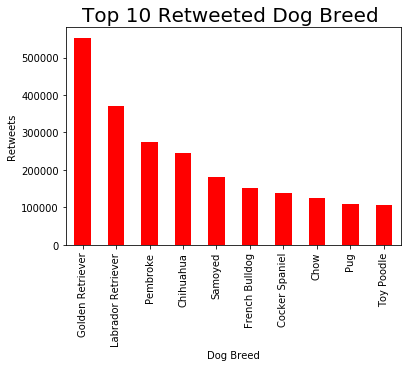

In [99]:
master2.query('breed != "Unrecognized"').groupby('breed')['retweets'].sum().sort_values(ascending=False).nlargest(10).plot(kind='bar',color='red')
plt.title("Top 10 Retweeted Dog Breed ",fontsize=20)
plt.xlabel("Dog Breed")
plt.ylabel("Retweets")
plt.savefig('Top_10_Retweeted_Dog_Breed.png')

In [100]:
master2.query('breed != "Unrecognized"').groupby('breed')['retweets'].sum().sort_values(ascending=False).nlargest(10)

breed
Golden Retriever      552580
Labrador Retriever    369693
Pembroke              273954
Chihuahua             245359
Samoyed               180794
French Bulldog        152728
Cocker Spaniel        137923
Chow                  124384
Pug                   109977
Toy Poodle            107781
Name: retweets, dtype: int64

With retweet count as the base as well, there are some differences with the positions below chihuahua with the frequency list and the favorites list.

In [101]:
master2.query('breed != "Unrecognized"').groupby('breed')['favorites'].mean().sort_values(ascending=False).nlargest(10)

breed
Bedlington Terrier         23876.666667
Saluki                     22979.750000
French Bulldog             19411.800000
Bouvier Des Flandres       17066.000000
Afghan Hound               16362.666667
Black-And-Tan Coonhound    16190.500000
Flat-Coated Retriever      15997.625000
Irish Water Spaniel        15537.000000
Leonberg                   14125.000000
Whippet                    13956.181818
Name: favorites, dtype: float64

In [102]:
master2.query('breed != "Unrecognized"').groupby('breed')['retweets'].mean().sort_values(ascending=False).nlargest(10)

breed
Bedlington Terrier    7761.666667
Afghan Hound          5551.000000
Standard Poodle       5152.545455
French Bulldog        5090.933333
English Springer      5051.000000
Saluki                4784.750000
Whippet               4764.727273
Cocker Spaniel        4597.433333
Eskimo Dog            4492.590909
Samoyed               4409.609756
Name: retweets, dtype: float64

By looking at the average of both favorites and retweets we can see the causes of the changes for the positions below Chihuahua for both favorites and retweets list 

## Analysis 4: Rating analyzed against Breed, Stages, Favorites and Retweets
We will breakdown the numerator and denominator ratings that people used to rate the dogs at WeRateDogs as well as analyze its relationship with Dog Breeds, Stages, its Favorites and Retweets

In [103]:
master3 = master2.copy()

In [104]:
#dropping those with outlier and impossible values
master3.drop([339, 728, 795, 917, 1015, 1040, 1058, 1124, 1200, 1372, 1373, 1504, 1563, 1787], axis=0, inplace=True)

In [105]:
master3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 2064
Data columns (total 20 columns):
tweet_id                      1976 non-null object
in_reply_to_status_id         22 non-null float64
in_reply_to_user_id           22 non-null float64
timestamp                     1976 non-null datetime64[ns]
source                        1976 non-null object
text                          1976 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1976 non-null object
rating_numerator              1976 non-null float64
rating_denominator            1976 non-null float64
name                          1976 non-null object
retweets                      1976 non-null int64
favorites                     1976 non-null int64
jpg_url                       1976 non-null object
img_num                       1976 non-null int64
dog_stages                  

In [106]:
master3['rating_ratio'] = master3['rating_numerator']/master3['rating_denominator']

In [107]:
master3['rating_ratio'].value_counts()

1.200    449
1.000    420
1.100    397
1.300    260
0.900    151
0.800     95
0.700     51
1.400     36
0.500     33
0.600     32
0.300     19
0.400     15
0.200      9
0.100      4
0.000      2
1.127      1
0.975      1
1.126      1
Name: rating_ratio, dtype: int64

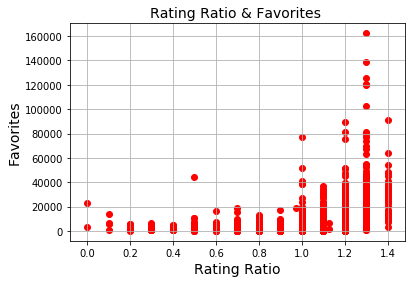

In [108]:
plt.scatter(master3['rating_ratio'], master3['favorites'], color='red')
plt.title('Rating Ratio & Favorites ', fontsize=14)
plt.xlabel('Rating Ratio', fontsize=14)
plt.ylabel('Favorites', fontsize=14)
plt.grid(True)
plt.savefig('Rating_Ratio & Favorites.png')
plt.show()

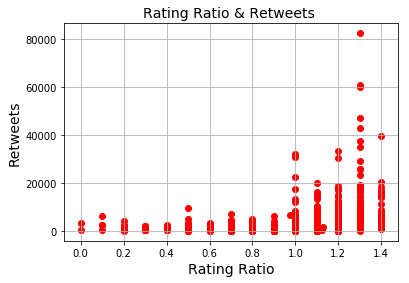

In [109]:
plt.scatter(master3['rating_ratio'], master3['retweets'], color='red')
plt.title('Rating Ratio & Retweets ', fontsize=14)
plt.xlabel('Rating Ratio', fontsize=14)
plt.ylabel('Retweets', fontsize=14)
plt.grid(True)
plt.savefig('Rating_Ratio & Retweets.png')
plt.show()

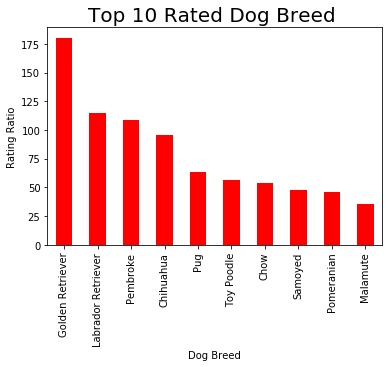

In [110]:
master3.query('breed != "Unrecognized"').groupby('breed')['rating_ratio'].sum().sort_values(ascending=False).nlargest(10).plot(kind='bar',color='red')
plt.title("Top 10 Rated Dog Breed ",fontsize=20)
plt.xlabel("Dog Breed")
plt.ylabel("Rating Ratio")
plt.savefig('Top_10_Rated_Dog_Breed.png')

In [111]:
master3.query('breed != "Unrecognized"').groupby('breed')['rating_ratio'].sum().sort_values(ascending=False).nlargest(10)

breed
Golden Retriever      180.300
Labrador Retriever    115.000
Pembroke              108.400
Chihuahua              96.000
Pug                    63.500
Toy Poodle             56.300
Chow                   53.600
Samoyed                48.100
Pomeranian             45.875
Malamute               35.900
Name: rating_ratio, dtype: float64

The ranking above had the same position as the retweet and favorites ranking for the positions above chihuahua. 

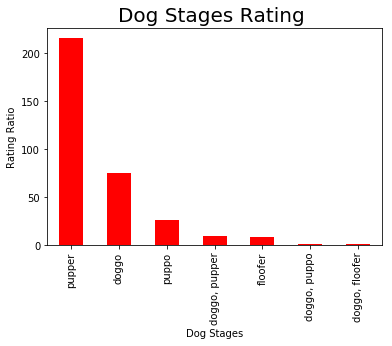

In [112]:
master3.groupby('dog_stages')['rating_ratio'].sum().sort_values(ascending=False).plot(kind='bar',color='red')
plt.title("Dog Stages Rating ",fontsize=20)
plt.xlabel("Dog Stages")
plt.ylabel("Rating Ratio")
plt.savefig('Dog_Stages_Rating.png')

In [113]:
master3.groupby('dog_stages')['rating_ratio'].sum().sort_values(ascending=False)

dog_stages
pupper            215.927
doggo              74.900
puppo              26.400
doggo, pupper       9.900
floofer             8.400
doggo, puppo        1.300
doggo, floofer      1.100
Name: rating_ratio, dtype: float64

according to the graph and the ranking above, pupper is the most highly rated dog stages in this data set